In [1]:
import pickle
from voc_dataset.voc_segmentation import VocSegmentationUNet
from voc_dataset.voc_index import VocIndex
import cv2
import matplotlib.pyplot as plt

voc_dataset_index_path = "/home/igor/github/my/UNet_segmentator/voc_dataset/voc_segmentation_index.dat"
dataset = VocSegmentationUNet(voc_dataset_index_path, ["person"])

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    return 

In [3]:
example = dataset[21]

print(example.keys())

dict_keys(['input', 'target', 'weight'])


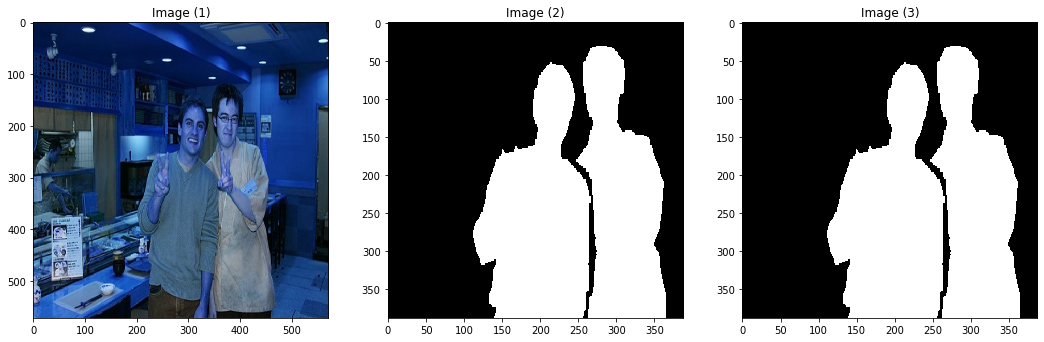

In [7]:
restored_img = dataset.decode_input_image(example["input"])
restored_map = example["target"]
restored_weights = cv2.normalize(example["weight"],None, 0, 255, cv2.NORM_MINMAX)
show_images([restored_img, restored_map, restored_weights])

In [12]:
example["weight"]

array([[0.83434386, 0.83434386, 0.83434386, ..., 0.83434386, 0.83434386,
        0.83434386],
       [0.83434386, 0.83434386, 0.83434386, ..., 0.83434386, 0.83434386,
        0.83434386],
       [0.83434386, 0.83434386, 0.83434386, ..., 0.83434386, 0.83434386,
        0.83434386],
       ...,
       [0.83434386, 0.83434386, 0.83434386, ..., 0.83434386, 0.83434386,
        0.83434386],
       [0.83434386, 0.83434386, 0.83434386, ..., 0.83434386, 0.83434386,
        0.83434386],
       [0.83434386, 0.83434386, 0.83434386, ..., 0.83434386, 0.83434386,
        0.83434386]])

In [8]:
index.color2label

{(0, 0, 128): 'aeroplane',
 (0, 128, 0): 'bicycle',
 (0, 128, 128): 'bird',
 (128, 0, 0): 'boat',
 (128, 0, 128): 'bottle',
 (128, 128, 0): 'bus',
 (128, 128, 128): 'car',
 (0, 0, 64): 'cat',
 (0, 0, 192): 'chair',
 (0, 128, 64): 'cow',
 (0, 128, 192): 'diningtable',
 (128, 0, 64): 'dog',
 (128, 0, 192): 'horse',
 (128, 128, 64): 'motorbike',
 (128, 128, 192): 'person',
 (0, 64, 0): 'pottedplant',
 (0, 64, 128): 'sheep',
 (0, 192, 0): 'sofa',
 (0, 192, 128): 'train',
 (128, 64, 0): 'tvmonitor'}

In [10]:
DATASET_ROOT = "/home/igor/datasets/VOC_2012/trainval"

In [11]:
from voc_dataset.utils import load_label_map

label_map = load_label_map("configs/label_map.txt")
print(label_map)

{'aeroplane': {'id': 0, 'color': (0, 0, 128)}, 'bicycle': {'id': 1, 'color': (0, 128, 0)}, 'bird': {'id': 2, 'color': (0, 128, 128)}, 'boat': {'id': 3, 'color': (128, 0, 0)}, 'bottle': {'id': 4, 'color': (128, 0, 128)}, 'bus': {'id': 5, 'color': (128, 128, 0)}, 'car': {'id': 6, 'color': (128, 128, 128)}, 'cat': {'id': 7, 'color': (0, 0, 64)}, 'chair': {'id': 8, 'color': (0, 0, 192)}, 'cow': {'id': 9, 'color': (0, 128, 64)}, 'diningtable': {'id': 10, 'color': (0, 128, 192)}, 'dog': {'id': 11, 'color': (128, 0, 64)}, 'horse': {'id': 12, 'color': (128, 0, 192)}, 'motorbike': {'id': 13, 'color': (128, 128, 64)}, 'person': {'id': 14, 'color': (128, 128, 192)}, 'pottedplant': {'id': 15, 'color': (0, 64, 0)}, 'sheep': {'id': 16, 'color': (0, 64, 128)}, 'sofa': {'id': 17, 'color': (0, 192, 0)}, 'train': {'id': 18, 'color': (0, 192, 128)}, 'tvmonitor': {'id': 19, 'color': (128, 64, 0)}}


In [12]:
from glob import glob
from os.path import join

images_list = glob(join(DATASET_ROOT, "JPEGImages/*.jpg"))
segmentation_maps_list = glob(join(DATASET_ROOT, "SegmentationClass/*.png"))

label_map = {
    "airplane": ()
}

In [13]:
segmented_images = None
with open(join(DATASET_ROOT, "ImageSets/Segmentation/train.txt"), "r") as f:
    lines = f.readlines()
    segmented_images = [x.strip() for x in lines]

In [14]:
import matplotlib.pyplot as plt
import cv2

example = segmented_images[40]
test_img_path = DATASET_ROOT + "/JPEGImages/"+example+".jpg"
test_map_path = DATASET_ROOT + "/SegmentationClass/"+example+".png"
test_img = cv2.imread(test_img_path)
test_map = cv2.imread(test_map_path)

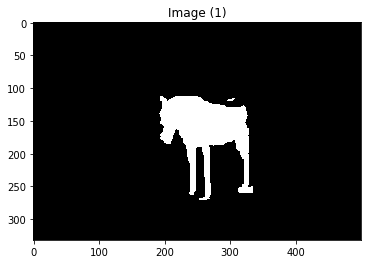

In [28]:
show_images([np.all(test_map == np.asarray([128, 0, 192]), axis=2)])

In [30]:
a = np.all(test_map == np.asarray([128, 0, 192]), axis=2)
np.sum(a)

10990

In [9]:
import numpy as np

hist = {}

for j in range(test_map.shape[0]):
    for i in range(test_map.shape[1]):
        pixel = tuple(test_map[j, i, :].tolist())
        if pixel not in hist.keys():
            hist[pixel] = 0
        hist[pixel] += 1

print(hist)

{(0, 0, 0): 137802, (192, 224, 224): 7589, (128, 128, 192): 5706, (128, 0, 192): 10990, (0, 64, 0): 3913}


In [11]:
hist = cv2.calcHist([test_map],[0],None,[256],[0,256])

print(hist)

[[141715.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]
 [     0.]

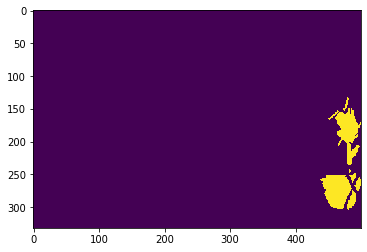

In [10]:
mask = np.zeros(shape=(test_img.shape[0], test_img.shape[1]), dtype=np.uint8)
for j in range(mask.shape[0]):
    for i in range(mask.shape[1]):
        if (test_map[j, i, 0], test_map[j, i, 1], test_map[j, i, 2]) == (0, 64, 0):
            mask[j, i] = 255

plt.imshow(mask)

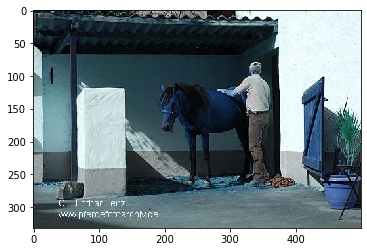

In [14]:
plt.imshow(test_img)

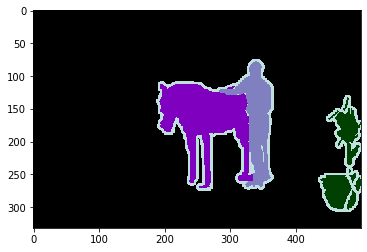

In [15]:
plt.imshow(test_map)

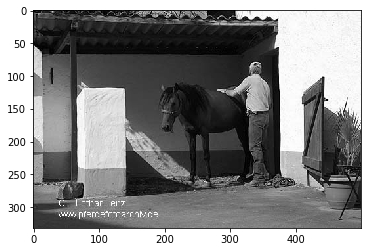

In [16]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
gray_rgb[:,:,1] += (0.1*mask).astype(np.uint8)

plt.imshow(gray_rgb)